In [31]:
import os
os.environ['OMP_NUM_THREADS']= '1'
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [32]:
file_path = 'E:/InternshipTasks/task 2/Mall_Customers.csv'
data = pd.read_csv(file_path)

In [33]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [34]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [35]:
wcss = []

In [36]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

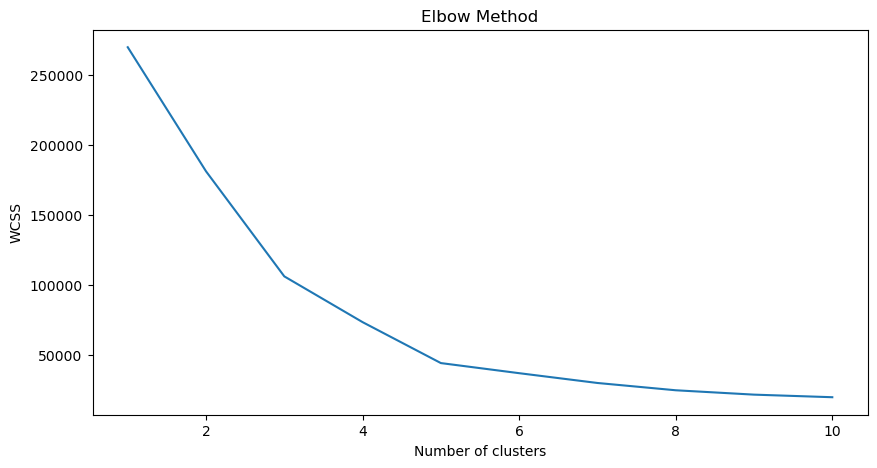

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [39]:
data['Cluster'] = y_kmeans

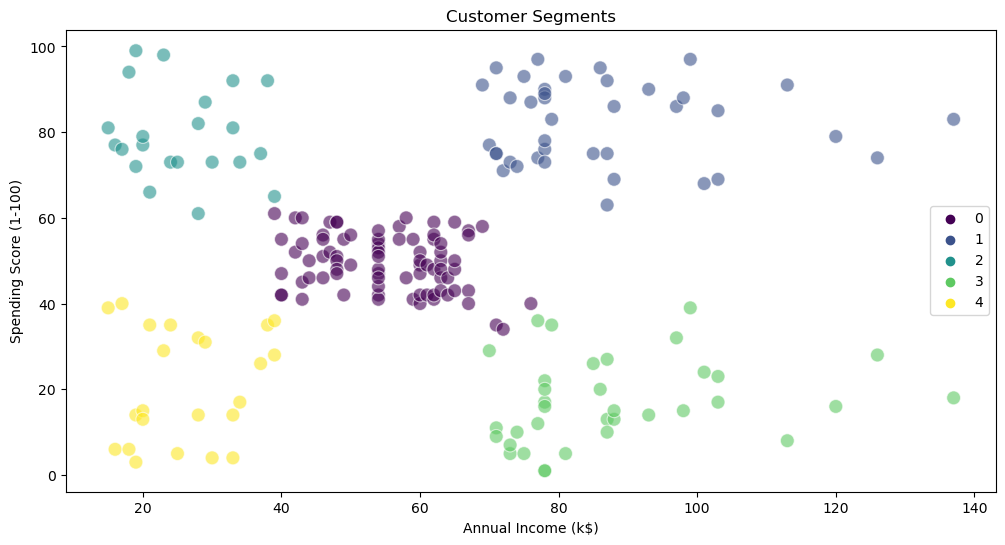

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [43]:
output_file_path = 'E:/InternshipTasks/PRODIGY_ML_02/Mall_Customers_Clustered.csv'
data.to_csv(output_file_path, index=False)
print(f"Clustered data saved to {output_file_path}")

Clustered data saved to E:/InternshipTasks/PRODIGY_ML_02/Mall_Customers_Clustered.csv
